In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
import json
import ast
from itertools import chain
import re
from statsmodels.distributions.empirical_distribution import ECDF
from textblob import TextBlob
import altair as alt

In [5]:
data_dir = "../../data"

interactions = pd.read_csv(f"{data_dir}/RAW_interactions.csv")
recipes = pd.read_csv(f"{data_dir}/RAW_recipes.csv")
pp_users = pd.read_csv(f"{data_dir}/PP_users.csv") #optional
pp_recipes = pd.read_csv(f"{data_dir}/PP_recipes.csv")  #optional 


print("Interactions Data:")
display(interactions.head())

print("Recipes Data:")
display(recipes.head())

print("Preprocessed Users:")
display(pp_users.head())

print("Preprocessed Recipes:")
display(pp_recipes.head())


Interactions Data:


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


Recipes Data:


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Preprocessed Users:


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


Preprocessed Recipes:


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [6]:
#Top 10 most active users
top_users = interactions['user_id'].value_counts().head(10)
print("Top 10 most active users:\n", top_users)

Top 10 most active users:
 user_id
424680    7671
37449     5603
383346    4628
169430    4076
128473    3917
89831     3353
58104     3288
133174    3107
199848    3018
305531    2902
Name: count, dtype: int64


# Recipes dataset

In [7]:
print("\n--- RAW_RECIPES ANALYSIS ---")
print(f"Total recipes: {len(recipes)}")
print(f"\nData types:\n{recipes.dtypes}")
print(f"\nMissing values:\n{recipes.isnull().sum()}")

# Extract statistics about recipes
print("\nRecipe Statistics:")
print(f"Average cooking time: {recipes['minutes'].mean():.2f} minutes")
print(f"Median cooking time: {recipes['minutes'].median()} minutes")
print(f"Average number of steps: {recipes['n_steps'].mean():.2f}")
print(f"Average number of ingredients: {recipes['n_ingredients'].mean():.2f}")


--- RAW_RECIPES ANALYSIS ---
Total recipes: 231637

Data types:
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Missing values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Recipe Statistics:
Average cooking time: 9398.55 minutes
Median cooking time: 40.0 minutes
Average number of steps: 9.77
Average number of ingredients: 9.05


In [8]:
id_to_name = dict(zip(recipes['id'], recipes['name']))
top_recipes = interactions['recipe_id'].value_counts().head(10)
top_recipes_named = top_recipes.rename(index=id_to_name)
print("Top 10 most reviewed recipes:\n", top_recipes_named)

Top 10 most reviewed recipes:
 recipe_id
best banana bread                                    1613
to die for crock pot roast                           1601
crock pot chicken with black beans   cream cheese    1579
creamy cajun chicken pasta                           1448
best ever banana cake with cream cheese frosting     1322
yes  virginia there is a great meatloaf              1305
jo mama s world famous spaghetti                     1234
whatever floats your boat  brownies                  1220
kittencal s italian melt in your mouth meatballs      997
japanese mum s chicken                                904
Name: count, dtype: int64


Correlation Between Recipe Popularity & Ratings

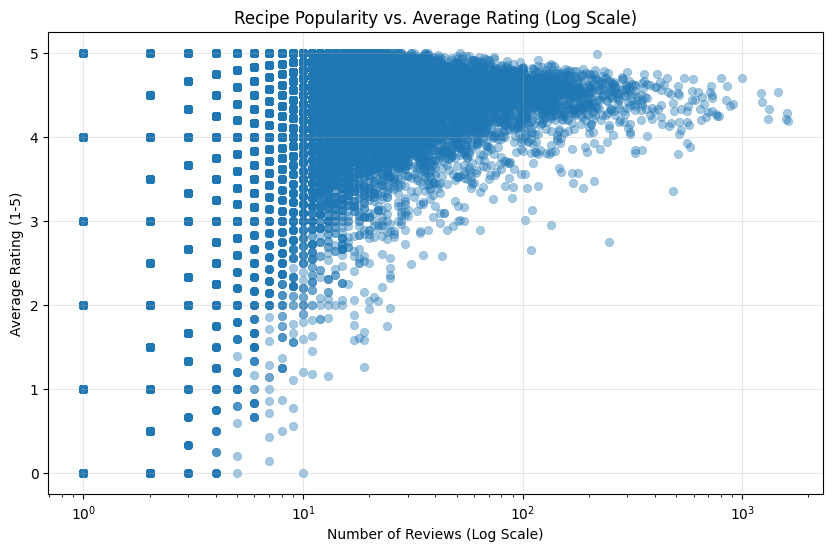

In [9]:
recipe_review_counts = interactions.groupby('recipe_id').size().rename('review_count')
recipe_avg_ratings = interactions.groupby('recipe_id')['rating'].mean().rename('avg_rating')

recipe_stats = pd.merge(recipe_review_counts,recipe_avg_ratings,on='recipe_id')

plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    data=recipe_stats,
    x='review_count',
    y='avg_rating',
    alpha=0.4,
    edgecolor=None
)
plt.xscale('log')
plt.title('Recipe Popularity vs. Average Rating (Log Scale)')
plt.xlabel('Number of Reviews (Log Scale)')
plt.ylabel('Average Rating (1-5)')
plt.grid(alpha=0.3)
plt.show()


Since the many recipes will have few reviews and popular recipes will have a lot of reviews, the distribution is clearly skewed. We use Spearman's Rank correlation since is better suiteed for skewed data.

In [10]:
corr_coef_spearman = stats.spearmanr(recipe_stats['review_count'], recipe_stats['avg_rating'])[0]
print(f"Spearman Correlation Coefficient: {corr_coef_spearman:.3f}")

Spearman Correlation Coefficient: -0.155


-0.155 is considered a very weak relationship between popularity of a recipe and its average rating.

Dietary & Ingredient Analysis

/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/3490354625.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ingredient', data=top_ingr_df, palette="coolwarm")


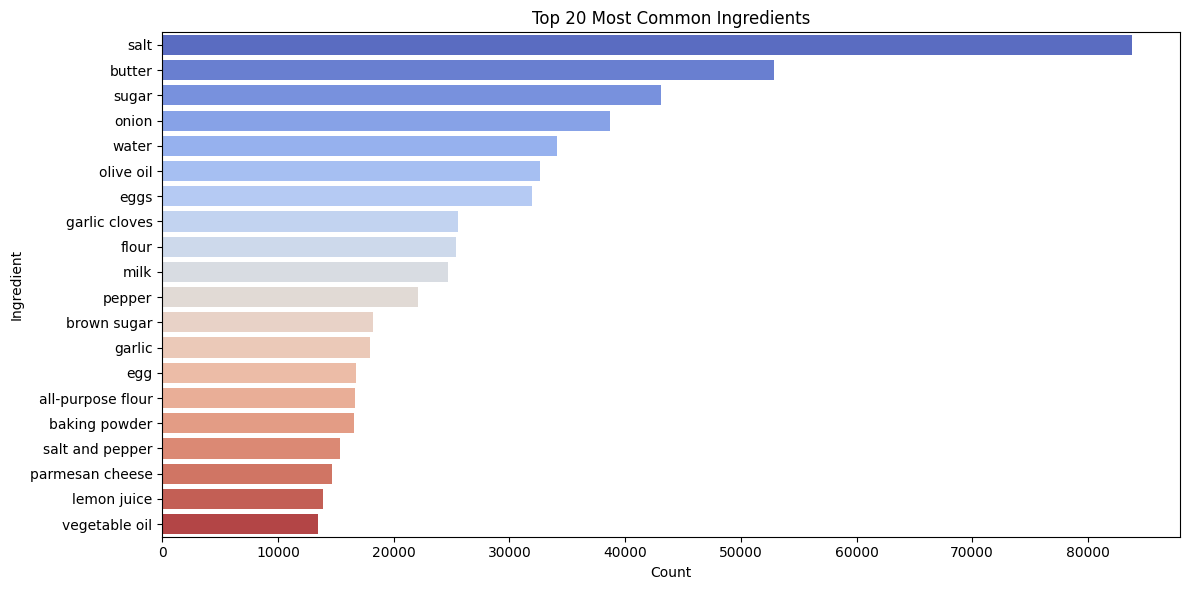

In [11]:
all_ingredients = []
for ingredients in recipes['ingredients'].dropna():
    try:
        ingr_list = json.loads(ingredients.replace("'", '"'))
        all_ingredients.extend(ingr_list)
    except:
        continue

# Get top 20 most common ingredients
top_ingredients = Counter(all_ingredients).most_common(20)
top_ingr_df = pd.DataFrame(top_ingredients, columns=['ingredient', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='ingredient', data=top_ingr_df, palette="coolwarm")
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.tight_layout()
plt.show()

During the exploration of the `ingredients` field, we noticed inconsistencies/duplicates in the way ingredients are labeled:
- Some ingredients refer to the same item but are listed differently. Examples include:`garlic` vs. `garlic cloves`, `egg` vs. `eggs`,`olive oil` vs. `extra virgin olive oil`

This lack of standardization can introduce noise into our model:
- It artificially inflates the number of unique ingredients.
- It affects ingredient co-occurrence patterns.

In [12]:
recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)
ingredients = recipes.explode('ingredients')[['id', 'ingredients']]
ingredients['ingredients'] = ingredients['ingredients'].str.lower().str.strip()
ingredient_counts = ingredients['ingredients'].value_counts()

In [13]:
print(ingredient_counts)

ingredients
salt                    85746
butter                  54975
sugar                   44535
onion                   39065
water                   34914
                        ...  
hot hungarian pepper        1
noilly prat                 1
ovolini                     1
ginseng extract             1
nepitella                   1
Name: count, Length: 14942, dtype: int64


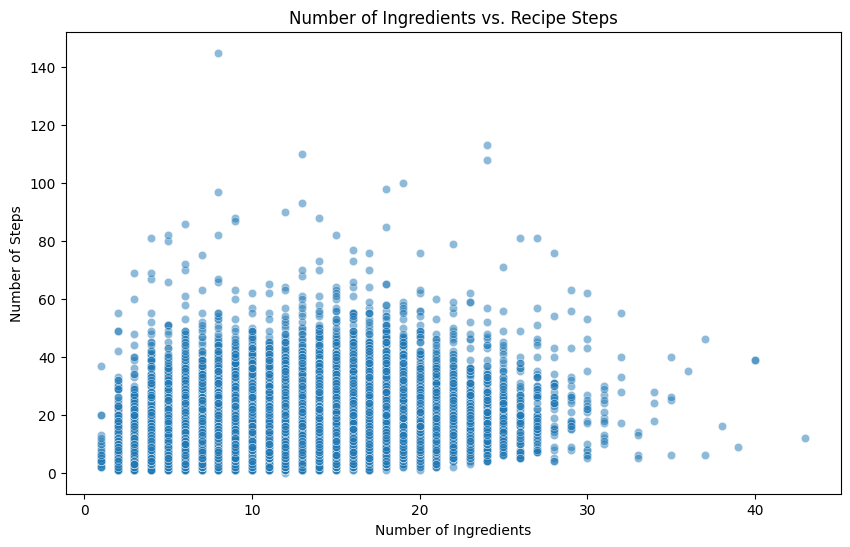

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=recipes['n_ingredients'], y=recipes['n_steps'], alpha=0.5)
plt.title('Number of Ingredients vs. Recipe Steps')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Steps')
plt.show()

Most recipes use less than 30 ingredients, very few recipes exceed 30 ingredients. The majority of the recipes has less than 60 steps. Not important for this project, but perhaps it is important to check outliers.

## Explore tags

In [15]:
print(type(recipes['tags'].iloc[0]))

<class 'str'>


In [16]:
# Convert stringified lists into actual lists
recipes['tags'] = recipes['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
print(type(recipes['tags'].iloc[0]))

<class 'list'>


In [17]:
all_tags = list(chain.from_iterable(recipes['tags']))
unique_tags = set(all_tags) #unique values
unique_tags = sorted(unique_tags)

print(f"Number of unique tags: {len(unique_tags)}")
print(unique_tags)

Number of unique tags: 552
['', '1-day-or-more', '15-minutes-or-less', '3-steps-or-less', '30-minutes-or-less', '4-hours-or-less', '5-ingredients-or-less', '60-minutes-or-less', 'Throw the ultimate fiesta with this sopaipillas recipe from Food.com.', 'a1-sauce', 'african', 'american', 'amish-mennonite', 'angolan', 'appetizers', 'apples', 'april-fools-day', 'argentine', 'artichoke', 'asian', 'asparagus', 'australian', 'austrian', 'avocado', 'bacon', 'baja', 'baked-beans', 'baking', 'bananas', 'bar-cookies', 'barbecue', 'bass', 'bean-soup', 'beans', 'beans-side-dishes', 'bear', 'beef', 'beef-barley-soup', 'beef-crock-pot', 'beef-kidney', 'beef-liver', 'beef-organ-meats', 'beef-ribs', 'beef-sauces', 'beef-sausage', 'beginner-cook', 'beijing', 'belgian', 'berries', 'beverages', 'birthday', 'biscotti', 'bisques-cream-soups', 'black-bean-soup', 'black-beans', 'blueberries', 'bok-choys', 'brazilian', 'bread-machine', 'bread-pudding', 'breads', 'breakfast', 'breakfast-casseroles', 'breakfast-e

In [18]:
tag_counts = Counter(all_tags)
#Top 20 commmon tags
tag_counts.most_common(20)

[('preparation', 230546),
 ('time-to-make', 225326),
 ('course', 218148),
 ('main-ingredient', 170446),
 ('dietary', 165091),
 ('easy', 126062),
 ('occasion', 114145),
 ('cuisine', 91165),
 ('low-in-something', 85776),
 ('main-dish', 71786),
 ('equipment', 70436),
 ('60-minutes-or-less', 69990),
 ('number-of-servings', 58949),
 ('meat', 56042),
 ('30-minutes-or-less', 55077),
 ('vegetables', 53814),
 ('taste-mood', 52143),
 ('4-hours-or-less', 49497),
 ('north-american', 48479),
 ('3-steps-or-less', 44933)]

In [19]:
# Search for tags containing 'sugar' --> find tag low-sugar
sugar_tags = [tag for tag in unique_tags if 'sugar' in tag.lower()]

print(f"Tags related to sugar ({len(sugar_tags)} found):")
print(sugar_tags)

Tags related to sugar (1 found):
['sugar-cookies']


/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/2923487789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df.head(20), x='Count', y='Tag', palette='viridis')


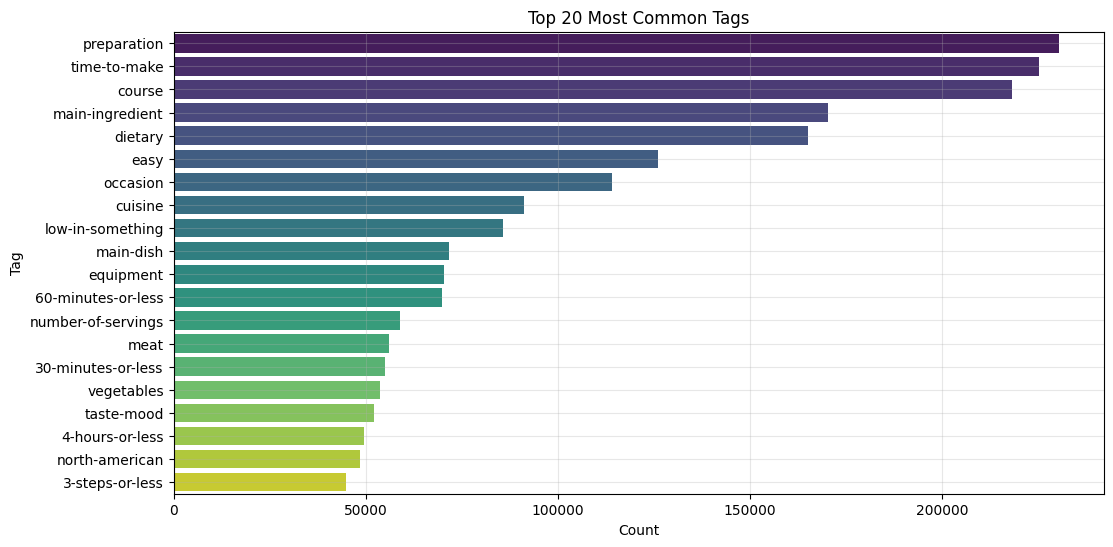

In [20]:
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df.head(20), x='Count', y='Tag', palette='viridis')
plt.title('Top 20 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.grid(alpha=0.3)
plt.show()

low-in-something, time-to-make? is very vague 

## Dietary restrictions

### Expanded Dietary Keywords for Recipe Classification and Recommendation

In this project, we aim to recommend recipes based on **dietary restrictions**, **allergies**, and **user preferences**. To support this, we've created an expanded list of dietary labels. These tags will allow us to filter recipes, create personalized recommendations, and ensure we meet specific dietary needs.

#### Categories of Dietary Keywords Included:

#### 1. **Common Allergies / Sensitivities**
These tags help users avoid ingredients that are common allergens:
- `peanut-free` (common for severe allergies)
- `shellfish-free` (important for seafood allergies)
- `seafood-free` (broader avoidance beyond shellfish)
- `sesame-free` (now a top 9 allergen in US labeling laws)
- `corn-free` (less common, but relevant for some)
- `mustard-free` (common allergen in the EU)
- `sulfite-free` (relevant for sensitivities and asthma sufferers)

#### 2. **Lifestyle Diets**
Popular diet trends and eating patterns:
- `flexitarian` (primarily vegetarian with occasional meat)
- `pescatarian` (vegetarian plus seafood)
- `mediterranean` (popular, heart-healthy diet)
- `raw` (raw food diet, uncooked or minimally cooked)
- `macrobiotic` (holistic diet, plant-focused with whole grains)
- `zone diet` (older diet still followed by some individuals)

#### 3. **Religious or Cultural Diets**
Tags to address religious or cultural dietary restrictions:
- `kosher` (Jewish dietary laws)
- `halal` (Islamic dietary laws)
- `jain` (strict vegetarian, excludes root vegetables)
- `lacto-vegetarian` (vegetarian diet including dairy)
- `ovo-vegetarian` (vegetarian diet including eggs)

#### 4. **Low/Free Dietary Needs Beyond Macros**
Specific dietary modifications often related to medical or health concerns:
- `low-fat`
- `fat-free`
- `low-sodium`
- `salt-free`
- `cholesterol-free`
- `low-FODMAP` 
- `alkaline` 

#### 5. **Medical / Health Condition Diets**
Dietary plans designed to manage specific health conditions:
- `diabetic-friendly` (low glycemic index, controlled sugar)
- `renal diet` (safe for kidney health; low potassium, phosphorus)
- `anti-inflammatory` (aimed at reducing inflammation in the body)
- `heart-healthy` (supports cardiovascular health)

#### 6. **Others**
Labels commonly searched by health-conscious consumers:
- `organic` (free from synthetic pesticides/fertilizers)
- `non-GMO` (not genetically modified)
- `clean-eating` (emphasizes whole foods and minimal processing)


#### Why This Matters:
- These dietary tags enhance **recommendation precision**, allowing us to tailor recipe suggestions to users with specific health concerns, lifestyle preferences, cultural practices, and allergies.
- They help users **filter recipes** based on **dietary restrictions** and **preferences**.
- They can be **encoded as features** in deep learning models, allowing the system to **learn user preferences** over time.

In [21]:
#most known dietary restrictions
dietary_keywords = [
      'vegan', 'vegetarian', 'gluten-free', 'keto', 'low-carb', 'dairy-free',
    'nut-free', 'egg-free', 'soy-free', 'paleo', 'whole30', 'sugar-free',
    'wheat-free', 'plant-based', 'raw-vegan', 'low-fat', 'low-sodium'
]

#look for tags with low or free
pattern_low = re.compile(r'^low-', re.IGNORECASE)
pattern_free = re.compile(r'-free$', re.IGNORECASE)

auto_detected_tags = [tag for tag in unique_tags if (
    pattern_low.match(tag) or pattern_free.match(tag) or tag in ['vegan', 'vegetarian', 'keto', 'paleo', 'whole30']
    )]

combined_dietary_tags = sorted(set(dietary_keywords + auto_detected_tags))
dietary_counts = {tag: tag_counts[tag] for tag in combined_dietary_tags if tag in tag_counts}
diet_df = pd.DataFrame(list(dietary_counts.items()), columns=['Dietary Category', 'Count']).sort_values(by='Count', ascending=False)
diet_df.to_csv(f'{data_dir}/diet_df')


/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/1283265925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


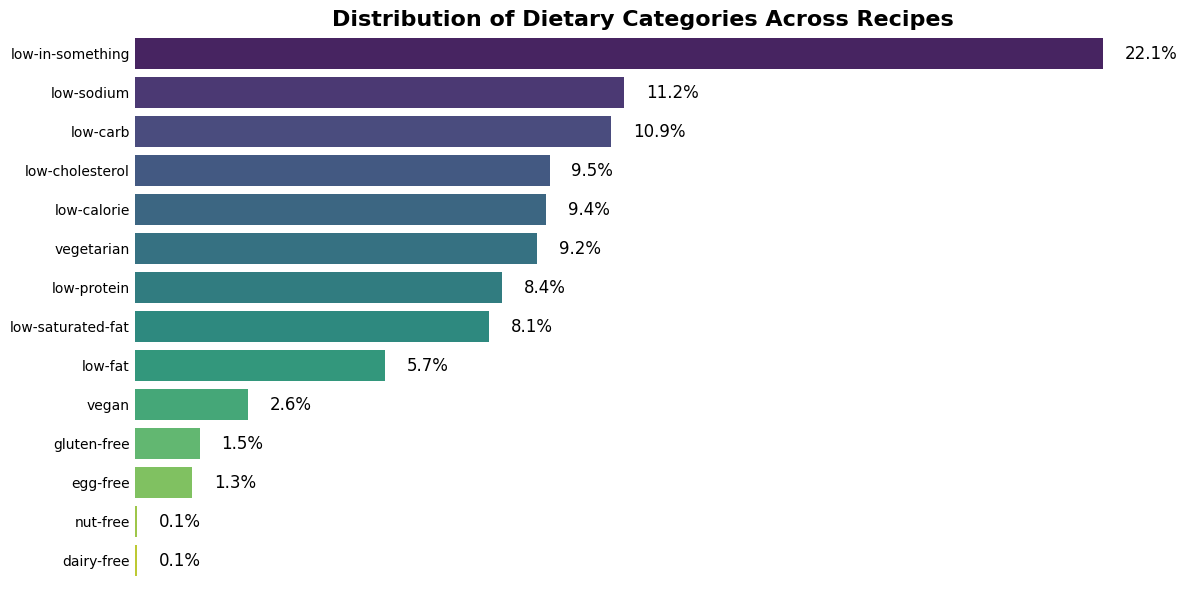

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=diet_df,
    x='Count',
    y='Dietary Category',
    palette='viridis'
)

sns.despine(left=True, bottom=True)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.set_title('Distribution of Dietary Categories Across Recipes', fontsize=16, weight='bold')
ax.set_xlabel('')  
ax.set_ylabel('') 
ax.grid(False)

total = diet_df['Count'].sum()

#labels at the end
for i in ax.patches:
    count = int(i.get_width())
    percentage = (count / total) * 100

    ax.text(
        i.get_width() + total * 0.005,         
        i.get_y() + i.get_height() / 2,     
        f'{percentage:.1f}%', # Show percentage
        va='center',
        fontsize=12
    )


plt.tight_layout()
plt.show()


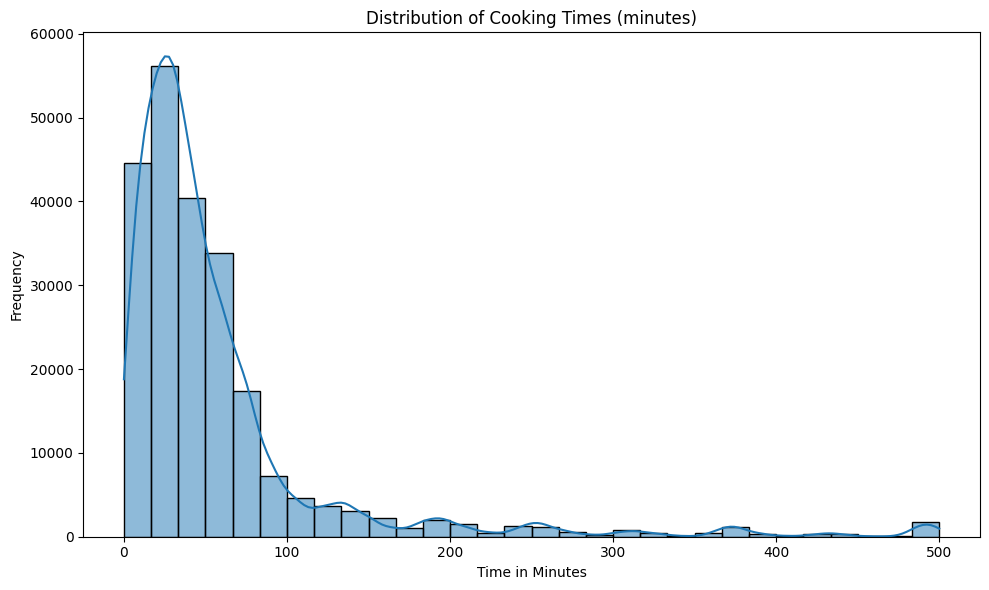

In [23]:
# Plot distribution of cooking time (excluding outliers beyond 500 minutes)
cooking_times = recipes[recipes['minutes'] <= 500]['minutes']
plt.figure(figsize=(10, 6))
sns.histplot(cooking_times, bins=30, kde=True)
plt.title('Distribution of Cooking Times (minutes)')
plt.xlabel('Time in Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('cooking_times_distribution.png') #save figure 
plt.show()


Most recipes have a cooking time of less than 2h (120 min). Perhaps we can check if the cooking time is correlated to the review of the users or are more popular or rated recipes.

In [24]:
#extract recipe_id and recipe cooking time from recipe
recipes_with_minutes = recipes[['id', 'minutes']].copy()
recipes_with_metrics = recipes_with_minutes.merge(recipe_avg_ratings, how='left', left_on='id', right_on='recipe_id'
                                                  ).merge(recipe_review_counts, how='left', left_on='id', right_on='recipe_id')

recipes_with_metrics.drop(columns=['recipe_id_x', 'recipe_id_y'], inplace=True, errors='ignore')

recipes_with_metrics[['avg_rating', 'review_count']] = recipes_with_metrics[['avg_rating', 'review_count']].fillna(0)

In [25]:
# Correlation between cooking time and average rating
corr_rating = recipes_with_metrics[['minutes', 'avg_rating']].corr(method='spearman').iloc[0, 1]
print(f"Spearman Correlation between Cooking Time and Average Rating: {corr_rating:.3f}")

# Correlation between cooking time and review count
corr_reviews = recipes_with_metrics[['minutes', 'review_count']].corr(method='spearman').iloc[0, 1]
print(f"Spearman Correlation between Cooking Time and Review Count: {corr_reviews:.3f}")


Spearman Correlation between Cooking Time and Average Rating: -0.043
Spearman Correlation between Cooking Time and Review Count: -0.016


Looks like there  is very weak correlation between cooking time and average rating and review count.

# Interactions dataset

In [26]:
user_counts = interactions['user_id'].value_counts()
user_counts_df = user_counts.reset_index()
user_counts_df.columns = ['user_id', 'interactions_count']
user_counts_df = user_counts_df.sort_values(by='interactions_count', ascending=False).reset_index(drop=True)

print (f"--- USER INTERACTION ANALYSIS ---")
print(f"Average interactions per user: {user_counts.mean():.2f}")
print(f"Median interactions per user: {user_counts.median()}")
print(f"Maximum interactions by a single user: {user_counts.max()}")

--- USER INTERACTION ANALYSIS ---
Average interactions per user: 5.00
Median interactions per user: 1.0
Maximum interactions by a single user: 7671


In [27]:
# Limit to top 200 users
top_users = user_counts_df.head(10)
print(top_users)

   user_id  interactions_count
0   424680                7671
1    37449                5603
2   383346                4628
3   169430                4076
4   128473                3917
5    89831                3353
6    58104                3288
7   133174                3107
8   199848                3018
9   305531                2902


In [28]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [29]:
interaction_distribution = user_counts_df['interactions_count'].value_counts().sort_index()
interaction_distribution = interaction_distribution.reset_index()
interaction_distribution.columns = ['num_interactions', 'num_users']


In [30]:
one_interaction_users = interaction_distribution.loc[interaction_distribution['num_interactions'] == 1, 'num_users'].values[0]
total_users = user_counts_df.shape[0]
percentage_one_interaction = (one_interaction_users / total_users) * 100
print(percentage_one_interaction)

73.37952950523017


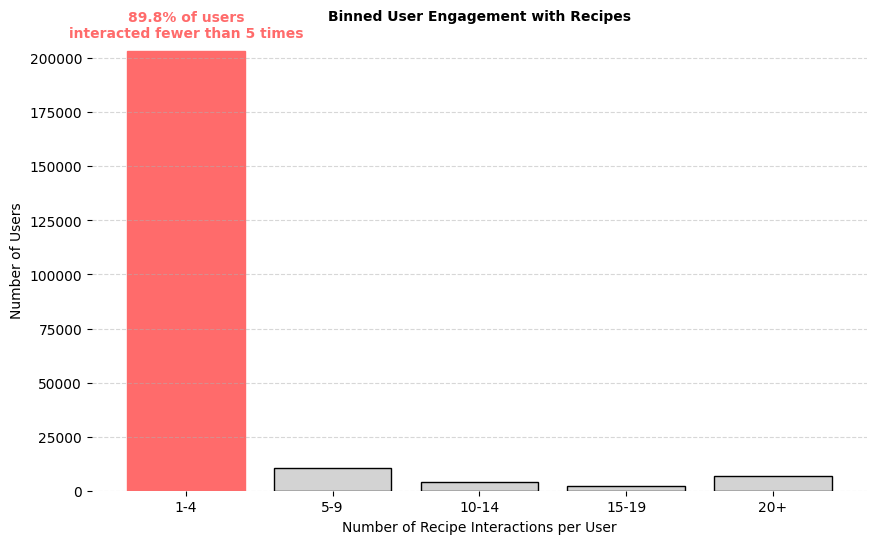

In [31]:
bins = [1, 5, 10, 15, 20, float('inf')]
labels = ['1-4', '5-9', '10-14', '15-19', '20+']

user_counts_df['interaction_bin'] = pd.cut(
    user_counts_df['interactions_count'],
    bins=bins,
    labels=labels,
    right=False
)


binned_distribution = user_counts_df['interaction_bin'].value_counts().sort_index().reset_index()
binned_distribution.columns = ['Interaction Range', 'Number of Users']

low_engagement_users = binned_distribution.loc[binned_distribution['Interaction Range'] == '1-4', 'Number of Users'].values[0]
percentage_low_engagement = (low_engagement_users / user_counts_df.shape[0]) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(binned_distribution['Interaction Range'], binned_distribution['Number of Users'],
               color='lightgrey', edgecolor='black')

bars[0].set_color('#FF6B6B')
plt.text(
    0,
    binned_distribution['Number of Users'].iloc[0] * 1.03,
    f"{percentage_low_engagement:.1f}% of users\ninteracted fewer than 5 times",
    ha='center',
    fontsize=10,
    color='#FF6B6B',
    weight='bold'
)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Binned User Engagement with Recipes", fontsize=10, weight='bold')
plt.xlabel("Number of Recipe Interactions per User", fontsize=10)
plt.ylabel("Number of Users", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [32]:
top_users['x'] = np.random.uniform(0, 2000, len(top_users))
top_users['y'] = np.random.uniform(0, 2000, len(top_users))

# Rank by interactions (descending)
top_users['user_rank'] = top_users.index + 1

# Spread them vertically (random or linear spacing)
top_users['y'] = np.random.uniform(0, 1000, len(top_users))

# Use rank for x-axis and random for y-axis
chart = alt.Chart(top_users).mark_circle(opacity=1).encode(
    x=alt.X('user_rank:Q', axis=None),
    y=alt.Y('y:Q', axis=None),
    size=alt.Size('interactions_count', scale=alt.Scale(range=[1, 5000])),
    color=alt.Color('interactions_count', scale=alt.Scale(scheme='blues')),
    tooltip=['user_id', 'interactions_count']
).properties(
    width=800,
    height=600
).configure_axis(
    grid=False,
    domain=False,
    ticks=False,
    labels=False
).configure_view(
    strokeWidth=0
)

chart.show()




/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/1819586426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_users['x'] = np.random.uniform(0, 2000, len(top_users))
/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/1819586426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_users['y'] = np.random.uniform(0, 2000, len(top_users))
/var/folders/p7/cshrl10s47n6p2hd0yjwjjsr0000gn/T/ipykernel_26998/1819586426.py:5: SettingWithCopyWarning: 
A value is trying to be set o

alt.Chart(...)

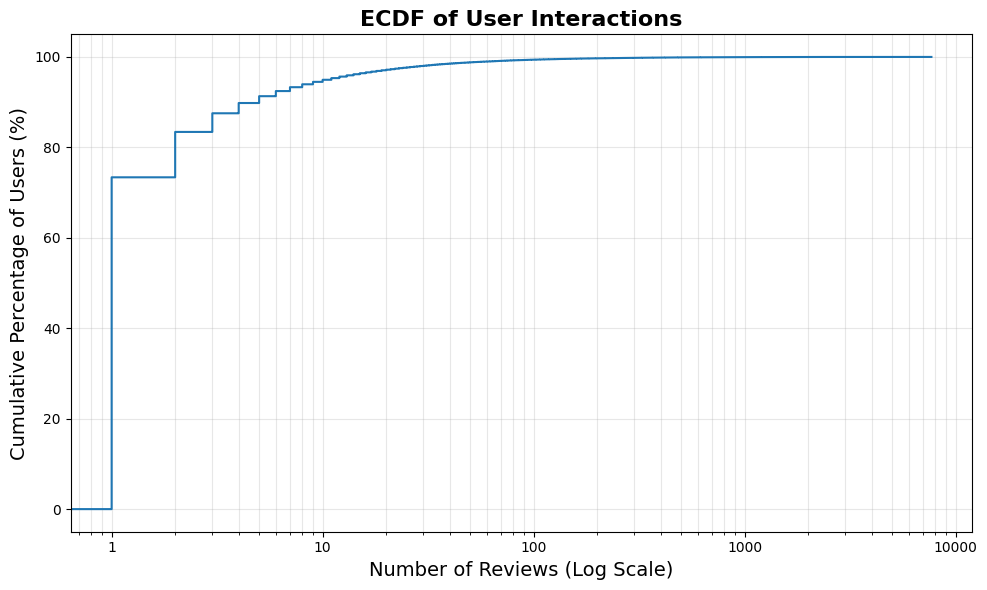

In [33]:
ecdf = ECDF(user_counts)

plt.figure(figsize=(10, 6))

# y-axis as percentages
plt.step(ecdf.x, ecdf.y * 100)

plt.title('ECDF of User Interactions', fontsize=16, weight='bold')
plt.xlabel('Number of Reviews (Log Scale)', fontsize=14)
plt.ylabel('Cumulative Percentage of Users (%)', fontsize=14)
plt.xscale('log')

# X-axis ticks
ticks = [1, 10, 100, 1000, 10000]
plt.xticks(ticks, [str(tick) for tick in ticks])
plt.grid(alpha=0.3, which='both')

plt.tight_layout()
plt.show()




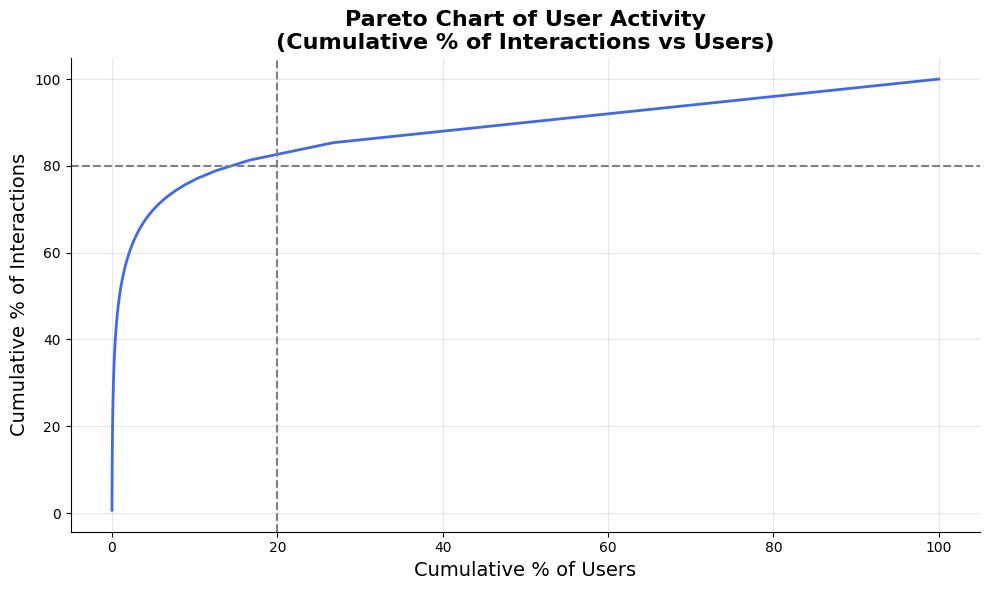

In [34]:
sorted_counts = user_counts.sort_values(ascending=False).reset_index(drop=True)

cum_interactions = sorted_counts.cumsum()
cum_interactions_percent = cum_interactions / cum_interactions.max() * 100

#user percentage
cum_users_percent = np.arange(1, len(sorted_counts)+1) / len(sorted_counts) * 100

plt.figure(figsize=(10, 6))
plt.plot(cum_users_percent, cum_interactions_percent, linewidth=2, color='royalblue')

plt.axhline(80, color='gray', linestyle='--')
plt.axvline(20, color='gray', linestyle='--')

plt.title('Pareto Chart of User Activity\n(Cumulative % of Interactions vs Users)', fontsize=16, weight='bold')
plt.xlabel('Cumulative % of Users', fontsize=14)
plt.ylabel('Cumulative % of Interactions', fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


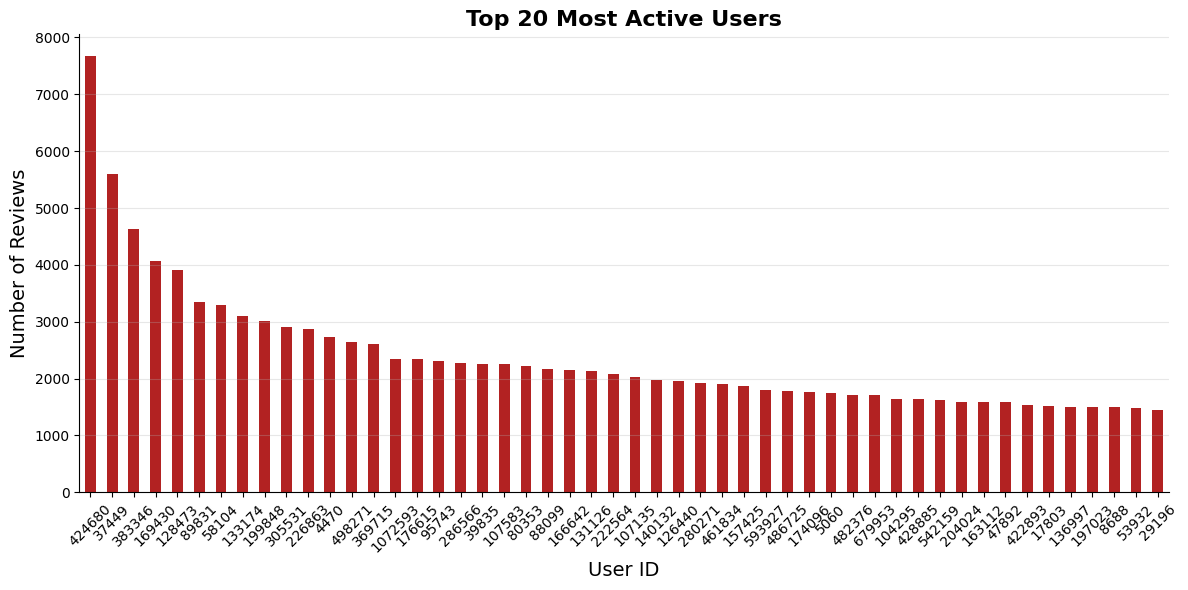

In [35]:
top_50_users = user_counts.sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 6))

top_50_users.plot(kind='bar', color='firebrick')

plt.title('Top 20 Most Active Users', fontsize=16, weight='bold')
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


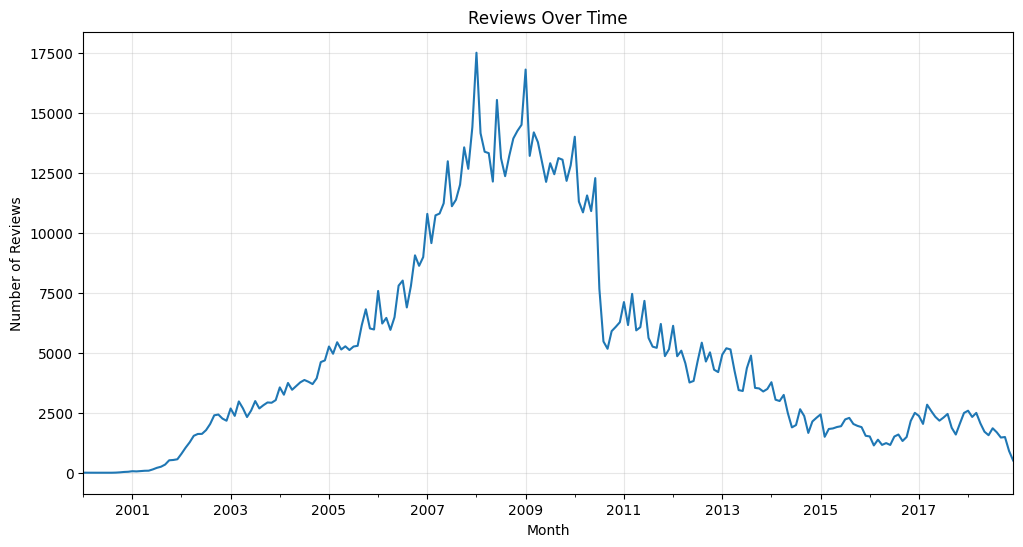

In [36]:
interactions['date'] = pd.to_datetime(interactions['date'])
#reviews over time
reviews_per_month = interactions.groupby(interactions['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_per_month.plot()
plt.title('Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(alpha=0.3)
plt.show()


Looks like the number of reviews has a down trend. 

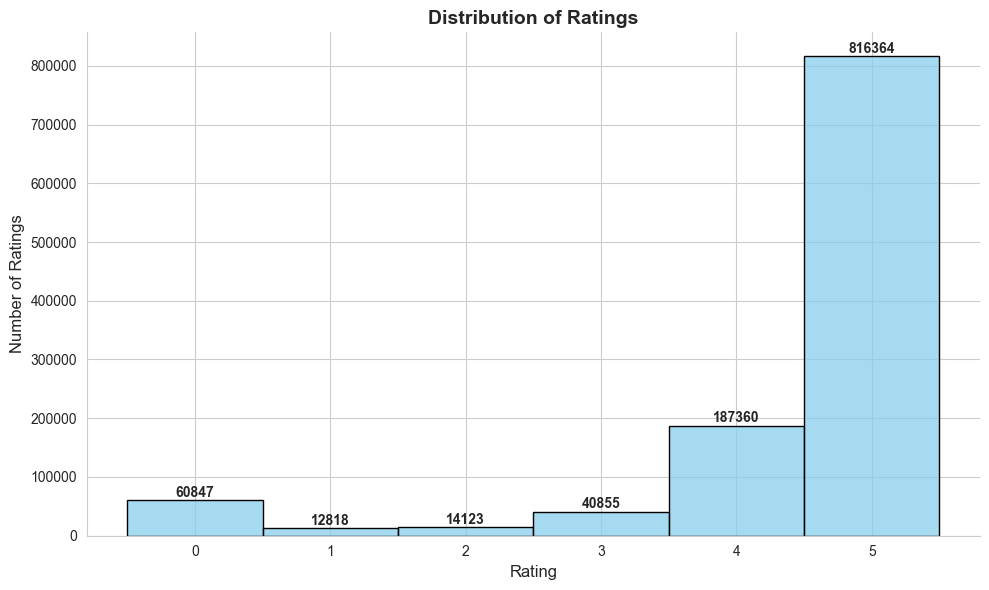

In [37]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.histplot(interactions['rating'], bins=5, discrete=True, kde=False, color='skyblue', edgecolor='black')

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2, height + 500, f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribution of Ratings', fontsize=14, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)


sns.despine()
plt.tight_layout()

Quick Sentimental Analysis 

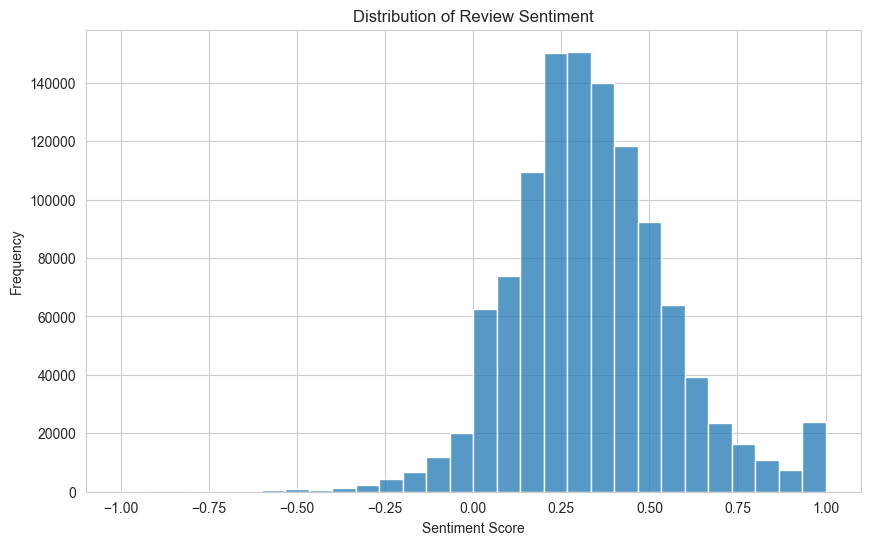

In [38]:
review_sentiment = interactions['review'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(review_sentiment, bins=30)
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


The distribution is skewed to the right, showing an overall positive sentiment trend. There's a long left tail, but it is relatively small, suggesting few outliers of strong negative feedback. Sentiment scores can be incorporated into feature engineering for a recommendation model—highly rated recipes with positive sentiment could be boosted, and recipes with negative sentiment could be flagged for review or adjustment.